# MATH 360 Modelling Assignment 2

## PART A: Numerical Solutions

## Instructions

Steps 1 to 4 in the modelling process have been completed for you below and your job is to complete the following tasks:

* Task 1: Apply the nondimensionalization procedure to the system of differential equations appearing at the end of Step 4 below, and interpret dimensionless parameters and scaling factors
* Task 2: Write Python code to compute numerical solutions of the nondimensionalized system and create different figures to clearly present numerical solutions
* Taks 3: Describe qualitative and quantitative properties of the system

For Task 1, you may present your work as LaTeX code in this notebook **or** you may write your solutions on paper.

For Tasks 2 and 3, you must present your work clearly in this notebook in the space below.

Note that it is possible to complete tasks 1 and 2 without understanding all the parts of the model construction. We recommend briefly reading the steps of the modelling process but then go directly to applying the nondimensionalization procedure and computing numerical solutions.

Discussed with Anthony Mirarchi, Nara Sheen, Umay Gokturk, Tiffany Wu

## Step 1: Problem Statement

The water in the North Atlantic ocean circulates between the polar region (near the North Pole) and the equatorial region (near the equator). The ocean currents are caused by the difference in water densities in both regions. Water density decreases with an increase in temperature due to an expansion of the volume, and water density increases with an increase in salinity (ie. salt concentration). The density differential pushes water from the bottom of the ocean in the polar region to the equator. There is also a surface flow from the equator to the polar region which keeps the sea level nearly the same in both regions. Each region also exchanges heat and salinity with the neighboring oceans. Salinity is added to the equatorial region at constant rate due to evaporation, and salinity is removed from the polar region due to precipitation. Construct a mathematical model of the temperature and salinity in both regions of the ocean as water circulates.

## Step 2: Variables and Parameters

| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| ocean temperature near the north pole | $T_0$ | $\Theta$ | dependent variable |
| ocean temperature near the equator | $T_1$ | $\Theta$ | dependent variable |
| ocean salinity near the north pole | $S_0$ | M L<sup>-3</sup> | dependent variable |
| ocean salinity near the equator | $S_1$ | M L<sup>-3</sup> | dependent variable |
| time | $t$ | T | independent variable |
| volume of water in each region | $V$ | L<sup>3</sup> | parameter |
| heat capacity of water | $C$ | M L<sup>2</sup> T<sup>-2</sup> $\Theta$<sup>-1</sup> | parameter |
| volumetric flow rate | $Q$ | L<sup>3</sup> T<sup>-1</sup> | function of $T_0,T_1,S_0,S_1$ |
| density differential to flow rate constant | $k$ | L<sup>6</sup> M<sup>-1</sup> T <sup>-1</sup> | parameter |
| temperature to density constant | $\alpha$ | M L<sup>-3</sup> $\Theta$<sup>-1</sup> | parameter |
| salinity to density constant | $\beta$ | 1 | parameter |
| salinity flux | $H$ | M L<sup>-3</sup> T<sup>-1</sup> | parameter |
| temperature of atmosphere/ocean surrounding polar region | $\theta_0$ | $\Theta$ | parameter |
| temperature of atmosphere/ocean surrounding equatorial region | $\theta_1$ | $\Theta$ | parameter |
| salinity of ocean surrounding polar region | $\sigma_0$ | M L<sup>-3</sup> | parameter |
| salinity of ocean surrounding equatorial region | $\sigma_1$ | M L<sup>-3</sup> | parameter |
| temperature differential to heat flow constant | $c$ | T<sup>-1</sup> | parameter |
| salinity differential to salinity flow constant | $d$ | T<sup>-1</sup> | parameter |

Note: **Salinity** is the concentration of salt in seawater.

## Step 3: Assumptions and Constraints

Simplify the model by representing the system as a pair of connected tanks such that each tank exchanges heat and salinity with its surroundings: 

<img src="model.png" width=500px style="margin: auto;">

* volume of water $V$ and heat capacity $C$ of both regions of the ocean is the same and remains constant
* temperatures $T_0$ and $T_1$ are homogeneous across each region
* salinity $S_0$ and $S_1$ are homogeneous across each region
* density of water decreases linearly with temperature
* density of water increases linearly with salinity
* the flow rate $Q$ is proportional to the difference in water densities
* the bottom flow rate $Q$ from the polar region to the equatorial region is equal to the surface flow rate in opposite direction
* the temperature and salinity in the surrounding atmosphere/ocean are constant
* temperature change due to surroundings is proportional to the difference in temperature, $\frac{dT}{dt} = c(T - \theta)$
* salinity flow from ocean to its surroundings is proportional to the difference in salinity, $\frac{dS}{dt} = d(S - \sigma)$
* constant salinity flow $H$ into equatorial region due to evaopration
* constant salinty flow $H$ out of polar region due to precipitation

## Step 4: Model Construction

Water density $\rho$ depends linearly on temperature $T$ and salinity $S$ therefore $\rho$ is a function of $T$ and $S$ of the form

$$
\rho(T,S) = \gamma - \alpha T + \beta S
$$

for some (positive) parameters $\alpha,\beta,\gamma$. The flow rate $Q$ is proportional to the difference in densities

$$
Q = k(\rho(T_0,S_0) - \rho(T_1,S_1)) = k(\alpha (T_1 - T_0) - \beta (S_1 - S_0))
$$

for some (positive) parameter $k$. It is possible for $Q$ to be positive or negative however the expected behaviour of the system is $Q > 0$ such that water flows from the polar region to the equator. In either case, the flow rate from one to the other is $|Q|$.

The difference in thermal energy between the two regions of the ocean is $C(T_1 - T_0)$ and therefore the difference in thermal energy per unit volume is

$$
\frac{C (T_1 - T_0)}{V}
$$

Since the two regions flow from one to the other at rate $|Q|$ we see that thermal energy is being transferred between the regions at the rate

$$
\frac{C |Q| (T_1 - T_0)}{V}
$$

Heat is also being transferred to the surrounding atmosphere/ocean of each region resulting in a temperature change proportional to the temperature difference. Apply the law of conservation of energy

$$
\begin{align*}
\frac{dT_0}{dt} &= \frac{|Q| (T_1 - T_0)}{V} - c(T_0 - \theta_0) \\
\frac{dT_1}{dt} &= \frac{|Q| (T_0 - T_1)}{V} - c(T_1 - \theta_1)
\end{align*}
$$

Apply the same process to find the flow of salinity between the two regions and also recall that salinity is being added at the equator at rate $H$ and removed in the polar region at rate $H$. Apply the law of conservation of mass to both regions and we find equations

$$
\begin{align*}
\frac{dS_0}{dt} &= \frac{|Q|}{V} (S_1 - S_0) - d(S_0 - \sigma_0) - H \\
\frac{dS_1}{dt} &= \frac{|Q|}{V} (S_0 - S_1) - d(S_1 - \sigma_1) + H
\end{align*}
$$

Altogether, we arrive at a system of differential equations

$$
\begin{align*}
\frac{dT_0}{dt} &= |q| (T_1 - T_0) - c(T_0 - \theta_0) \\
\frac{dT_1}{dt} &= |q| (T_0 - T_1) - c(T_1 - \theta_1) \\
\frac{dS_0}{dt} &= |q| (S_1 - S_0) - d(S_0 - \sigma_0) - H \\
\frac{dS_1}{dt} &= |q| (S_0 - S_1) - d(S_1 - \sigma_1) + H
\end{align*}
$$

where $q = \frac{k}{V}(\alpha (T_1 - T_0) - \beta (S_1 - S_0))$.

## Step 5: Analysis

### Nondimensionalization

**Task 1:** Apply the nondimensionalization procedure to the system of differential equations appearing at the end of Step 4 above, and interpret dimensionless parameters and scaling factors

**Your work here!**

Let $$T_0 = [T_0]T_0^{*}, T_1 = [T_1]T_1^{*}, S_0 = [S_0]S_0^{*}, S_1 = [S_1]S_1^{*}, t = [t]t^{*}$$

Also by intution, we can make $[T_0] = [T_1] = [T]$ and $[S_0] = [S_1] = [T]$. \\
Since $q = \frac{k}{V}(\alpha(T_1 - T_0) - \beta(S_1 - S_0))$, we have $q = \frac{k}{V}(\alpha([T]T_1^{*} - [T]T_0^{*}) - \beta([S]S_1^{*} - [S]S_0^{*}, S_1))$. 

Thus, we have:

$$
\begin{align*}
\frac{[T]}{[t]}\frac{dT_0}{dt} &=  \frac{k}{V}(\alpha([T]T_1^{*} - [T]T_0^{*}) - \beta([S]S_1^{*} - [S]S_0^{*}))([T]T_1^{*} - [T]T_0^{*}) - c([T]T_0^{*} - \theta_0) \\
\frac{[T]}{[t]}\frac{dT_1}{dt} &= \frac{k}{V}(\alpha([T]T_1^{*} - [T]T_0^{*}) - \beta([S]S_1^{*} - [S]S_0^{*})) ([T]T_0^{*} - [T]T_1^{*}) - c([T]T_1^{*} - \theta_1) \\
\frac{[S]}{[t]}\frac{dS_0}{dt} &= \frac{k}{V}(\alpha([T]T_1^{*} - [T]T_0^{*}) - \beta([S]S_1^{*} - [S]S_0^{*})) (S_1 - S_0) - d(S_0 - \sigma_0) - H \\
\frac{[S]}{[t]}\frac{dS_1}{dt} &= \frac{k}{V}(\alpha([T]T_1^{*} - [T]T_0^{*}) - \beta([S]S_1^{*} - [S]S_0^{*})) ([S]S_0^{*} - [S]S_1^{*}) - d([S]S_1^{*} - \sigma_1) + H
\end{align*}
$$

dividing by the coefficient of the derivative,

$$
\begin{align*}
\frac{dT_0}{dt} &=  \frac{k[t]}{V[T]}(\alpha([T]T_1^{*} - [T]T_0^{*}) - \beta([S]S_1^{*} - [S]S_0^{*}))([T]T_1^{*} - [T]T_0^{*}) - \frac{c[t]}{[T]}([T]T_0^{*} - \theta_0) \\
\frac{dT_1}{dt} &= \frac{k[t]}{V[T]}(\alpha([T]T_1^{*} - [T]T_0^{*}) - \beta([S]S_1^{*} - [S]S_0^{*})) ([T]T_0^{*} - [T]T_1^{*}) - \frac{c[t]}{[T]}([T]T_1^{*} - \theta_1) \\
\frac{dS_0}{dt} &= \frac{k[t]}{V[S]}(\alpha([T]T_1^{*} - [T]T_0^{*}) - \beta([S]S_1^{*} - [S]S_0^{*})) (S_1 - S_0) - \frac{d[t]}{[S]}(S_0 - \sigma_0) - \frac{d[t]H}{[S]} \\
\frac{dS_1}{dt} &= \frac{k[t]}{V[S]}(\alpha([T]T_1^{*} - [T]T_0^{*}) - \beta([S]S_1^{*} - [S]S_0^{*})) ([S]S_0^{*} - [S]S_1^{*}) - \frac{d[t]}{[S]}([S]S_1^{*} - \sigma_1) + \frac{d[t]H}{[S]}
\end{align*}
$$

We can choose,

$$[t] = -\frac{1}{c} [T] = \frac{cV}{k\alpha}, [S] = \frac{d^2}{k\beta H}$$

Now we have,

$$
\begin{align*}
\frac{dT_0}{dt} &=  |q|(\frac{1}{c}T_1^{*} - \frac{1}{c}T_0^{*}) - T_0^{*} + \frac{k\alpha \theta_0}{Vc} \\
\frac{dT_1}{dt} &= |q|(\frac{1}{c}T_0^{*} - \frac{1}{c}T_1^{*}) - T_1^{*} + \frac{k\alpha \theta_1}{Vc} \\
\frac{dS_0}{dt} &= |q|\frac{1}{c}(S_1 - S_0) - \frac{d}{c}S_0 + \frac{\sigma_0 kH}{\beta cd} - \frac{k}{\beta d^2c} \\
\frac{dS_1}{dt} &= |q|\frac{1}{c}(S_0^{*} - S_1^{*}) - \frac{d}{c}S_1^{*} - \frac{\sigma_1 kH}{\beta cd} + \frac{k}{\beta d^2c}
\end{align*}
$$
, where
$$ q = (cT_1^{*} - cT_0^{*}) - \left( \frac{\beta d^2}{Vh}S_1^{*} + \frac{\beta d^2}{Vh}S_0^{*} \right)$$


### Numerical Solutions

**Task 2:** Write Python code to compute numerical solutions of the nondimensionalized system and create different figures to clearly present numerical solutions

**Your work here!**

In [4]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

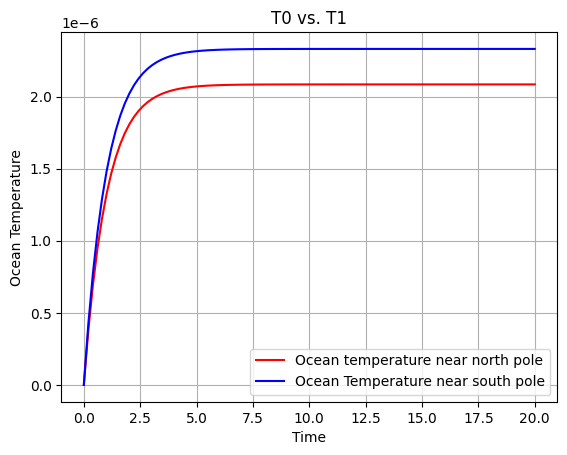

In [65]:
V = 1.3e10
k = 1
alpha = 10
beta = 10
theta0 = 271
theta1 = 303
c = 0.1
d = 0.1
sig0 = 0.03
sig1 = 0.035
H = 0.033


def f(u,t):
    q = np.abs(c*u[1]-c*u[0]-((beta*d**2)/(V*H))*u[2]+((beta*d**2)/(V*H))*u[3])

    dudt = np.zeros(4)
    dudt[0] = q * ((1/c)*u[1] - (1/c)*u[0]) - u[0] + ((k*theta0*alpha)/(V*c))
    dudt[1] = q * ((1/c)*u[0] - (1/c)*u[1]) - u[1] + ((k*theta1*alpha)/(V*c))
    dudt[2] = q * ((1/c)*u[3] - (1/c)*u[2]) - (d/c)*u[2] - ((k*sig0*H)/(beta*c*d)) - (k/(beta*d**2*c))
    dudt[3] = q * ((1/c)*u[2] - (1/c)*u[3]) - (d/c)*u[3] - ((k*sig1*H)/(beta*c*d)) + (k/(beta*d**2*c))
    return dudt


t = np.linspace(0, 20, 100)
u0 = [0,0, 0, 0]
F = spi.odeint(f, u0, t)
plt.plot(t, F[:,0], 'r', t, F[:,1], 'b'), plt.grid(True)
plt.ylabel("Ocean Temperature"), plt.xlabel("Time"), plt.title("T0 vs. T1")
plt.legend(["Ocean temperature near north pole", "Ocean Temperature near south pole"])
plt.show()

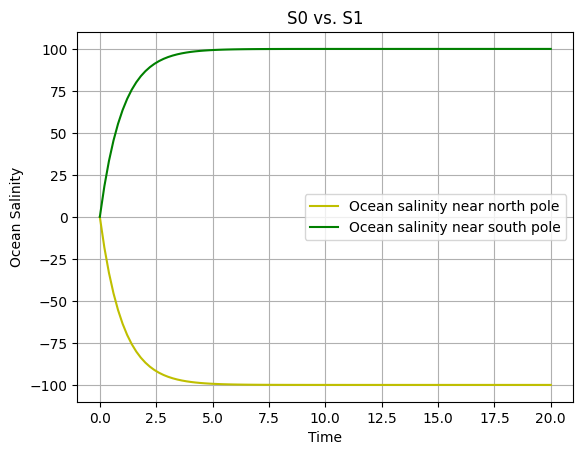

In [53]:
plt.plot(t, F[:,2], 'y', t, F[:,3], 'g'), plt.grid(True)
plt.ylabel("Ocean Salinity"), plt.xlabel("Time"), plt.title("S0 vs. S1")
plt.legend(["Ocean salinity near north pole", "Ocean salinity near south pole"])
plt.show()


## Describe Qualitative and Quantitative Properties of the System

**Task 3:** Describe qualitative and quantitative properties of the system

**Your work here!**

In [62]:
print(f"The equilibrium point of the ocean temperature near north pole is {F[-1,0]} and the equilibrium point of the ocean temperature near south pole is {F[-1,1]}")
print(f"The equilibrium point of the ocean salinity near north pole is {F[-1,2]} and the equilibrium point of the ocean salinity near south pole is {F[-1,3]}")

The equilibrium point of the ocean temperature near north pole is 2.084615555477671e-06 and the equilibrium point of the ocean temperature near south pole is 2.330769050407336e-06
The equilibrium point of the ocean salinity near north pole is -100.00975731633085 and the equilibrium point of the ocean salinity near south pole is 99.98830731637698


* As we can see in the analysis, we have an equilibrium points at values stated above. These are the results of the choices of parameters and constants. 
* Some of the parameters are chosen by experimenting with the graph and the nondimensionalized equiations and some are chosen from the internet. 
* For each ocean temperature near north and south pole, it changes much rapidly at the start, however, their rates are slowed down and eventually are stable near their equilibrium points. 
* Ocean salinity near north pole appeared to be overall decreasing over time; rapidly decreasing during around the first 1 second and then started to stabilize around the equilibrium point. Ocean salinity near south pole, on the other hand, it appeared to make a symmetric with the ocearn salinity near north pole. It started to increase rapidly and then stabilized around the equilibrium point. 
* When the volume gets smaller and smaller, the difference between the ocearn temperature near north and south pole decreases. Meaning that its gap is getting smaller as volume gets smaller and smaller. 
* The equations and graph are also dependent to the choices of $c$ and $d$. It was found that when $c$ and $d$ are high, the model was unstable. Thus, small values for the parameters were kept.
